In [1]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import itertools
!pip install unidecode
import unidecode
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.1 MB/s 


In [3]:
def clean_tweet(tweet, remove_hashtags = False):
    new_punc = list(string.punctuation)
    del new_punc[2]

    if remove_hashtags:
      tweet = re.sub(r"#[\w-]+", "", tweet)

    tweet = tweet.lower()
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub(r'\@[a-zA-Z0-9]*', ' ', tweet) # remove username start with @
    tweet = re.sub(r'https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet) # remove link in the tweet
    tweet = re.sub(r'\$[a-zA-Z0-9]*', ' ', tweet) # remove the variable start with $
    for punctuation in new_punc: # remove panctuations 
            tweet = tweet.replace(punctuation, '')
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] ) #remove one letter words
    tweet = ''.join(c[0] for c in itertools.groupby(tweet)) #remove duplicated letters
    tweet = unidecode.unidecode(tweet)  # normalizar as letras com acentos 
    tweet = ' '.join(word for word in tweet.split(' ') if word not in stop_words) # remove stopwords
 
    return tweet

In [4]:
#just use the FROM: dataset and you are fine :)
df = pd.read_csv('query_(from:AecioNeves).csv')

In [5]:
%%time
stop_words = stopwords.words('portuguese')
stop_words.remove('não')
addicional = [
            'd', 'ta', 'q', 'tah', 'tao', 'eh', 'vc', 'voce',
            'pq', 'quede', 'mto', 'mt', 'bj', 'bjs','vcs','bb','pra','ai',
            'b', 'sao', 'axo', 'mano', 'ae', 'neh', 'ai','la','ja','so',
            'porque', 'ne', 'no', 'iai', 'tbm', 'msm', 'jah', 'yahoo', 'yahoobr','rt']
stop_words.extend(addicional)
df['content'] = df['content'].astype(str)
df["content_clean"]=df["content"].apply(lambda x:clean_tweet(x, True))
df["content_clean_hashtag"]=df["content"].apply(lambda x:clean_tweet(x))
#df = df.drop_duplicates(subset="content_clean",keep="first")

CPU times: user 349 ms, sys: 4.9 ms, total: 354 ms
Wall time: 363 ms


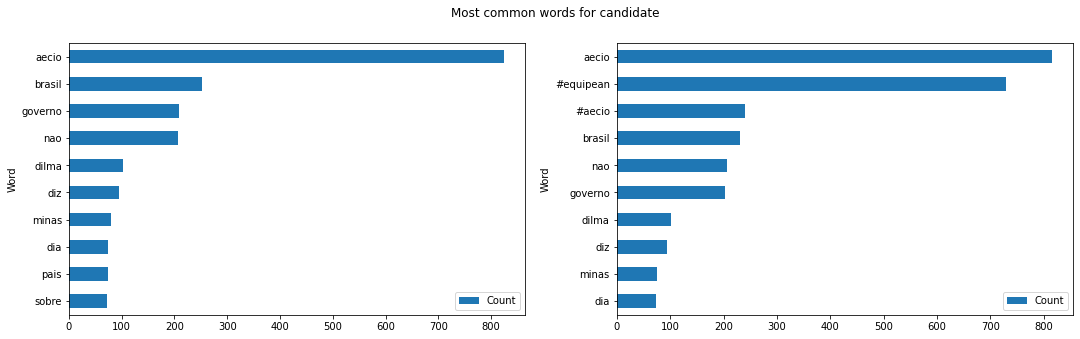

In [7]:
#Count all words in column
most_common_words_hashtag = Counter(" ".join(df["content_clean_hashtag"]).split()).most_common(10)
most_common_words = Counter(" ".join(df["content_clean"]).split()).most_common(10)

#create a new dadtaframe with only two columns
df_most_common_hashtag = pd.DataFrame(most_common_words_hashtag, columns = ['Word', 'Count'])
df_most_common = pd.DataFrame(most_common_words, columns = ['Word', 'Count'])

fig, axes = plt.subplots(1, 2, figsize=(18,5))
fig.suptitle('Most common words for candidate')
df_most_common.plot.barh(x='Word', y='Count', ax=axes[0])
axes[0].invert_yaxis()
df_most_common_hashtag.plot.barh(x='Word', y='Count', legend='with #hashtag', ax=axes[1])
axes[1].invert_yaxis()